Without Gaussian Noise

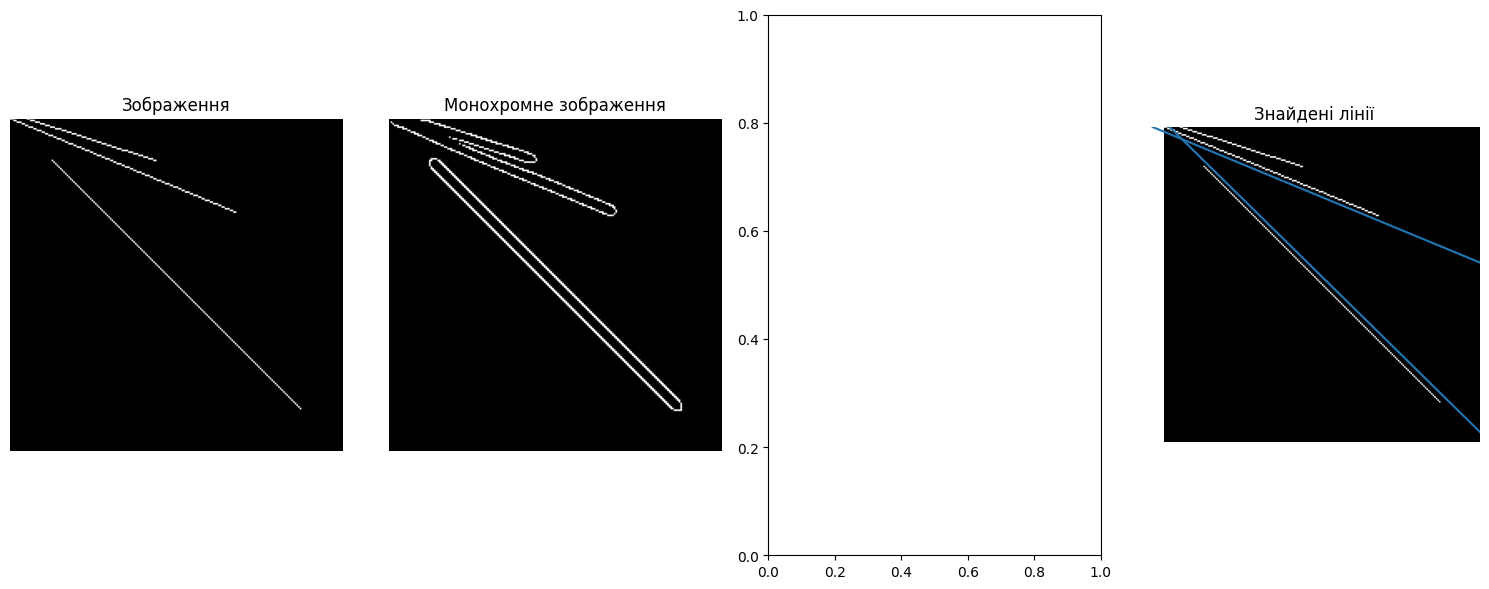

In [7]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
import matplotlib.pyplot as plt
from matplotlib import cm

image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[draw_line(0, 10, 25, 87)] = 255
image[draw_line(56, 135, 0, 0)] = 255
edges = canny(image, 3)

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(edges, theta=tested_angles)

fig, axes = plt.subplots(1, 4, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Зображення')
ax[0].set_axis_off()

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Монохромне зображення')
ax[1].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()

bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

# ax[2].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
# ax[2].set_title('Hough transform')
# ax[2].set_xlabel('Angles (degrees)')
# ax[2].set_ylabel('Distance (pixels)')
# ax[2].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Знайдені лінії')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[3].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

With Gaussian Noise

C:\Users\Silbc\AppData\Local\Temp\ipykernel_25620\3708779552.py:15: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  image = random_noise(image, mode='gaussian', seed=25, clip=True)


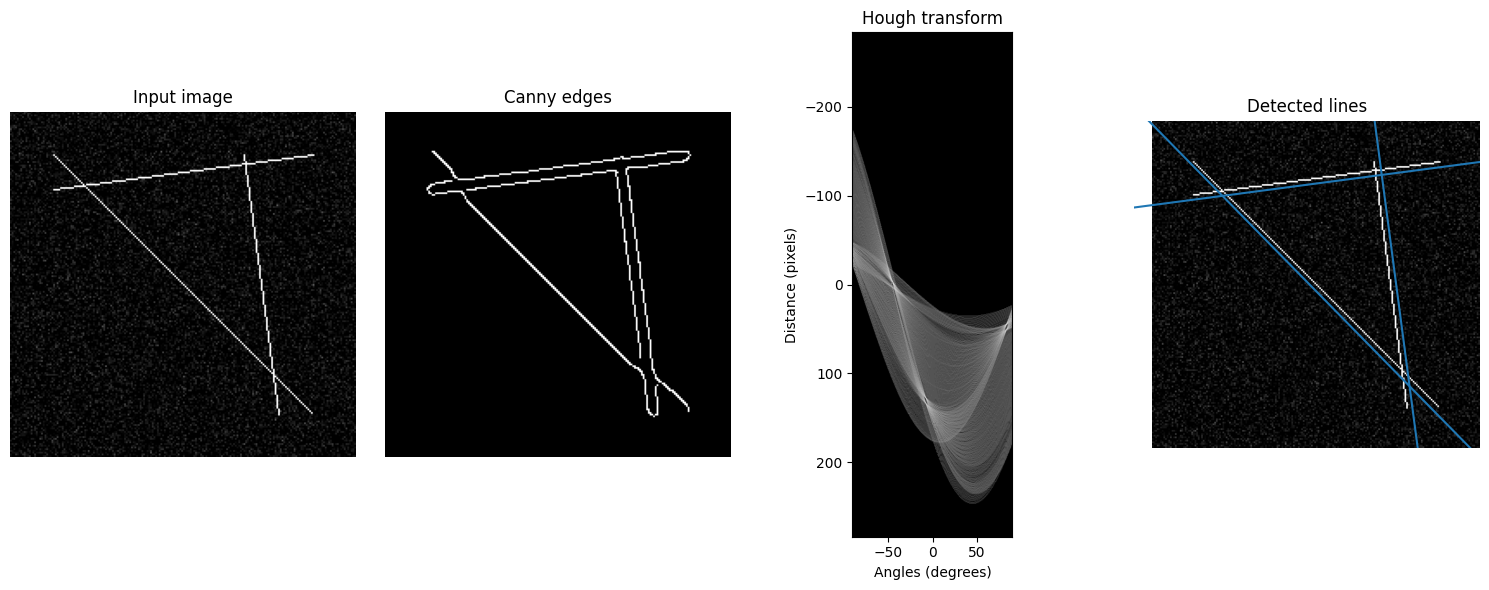

In [2]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage.util import random_noise
import matplotlib.pyplot as plt
from matplotlib import cm

image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[draw_line(45, 25, 25, 175)] = 255
image[draw_line(25, 135, 175, 155)] = 255

image = random_noise(image, mode='gaussian', seed=25, clip=True)

edges = canny(image, 3)

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(edges, theta=tested_angles)

fig, axes = plt.subplots(1, 4, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')
ax[1].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()

bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

ax[2].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[2].set_title('Hough transform')
ax[2].set_xlabel('Angles (degrees)')
ax[2].set_ylabel('Distance (pixels)')
ax[2].axis('image')

ax[3].imshow(image, cmap=cm.gray)
ax[3].set_ylim((image.shape[0], 0))
ax[3].set_axis_off()
ax[3].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[3].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()